# Summary
- Spearmans of neuron rankings improve with higher layers
- Lower layers of xlnet large actually are similar to higher layers of bert large. 
- Final four layers of bert large are quite different from the rest. Weird, because architecturally nothing has changed.

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [2]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
#     "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results14_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [4]:
# rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}
rk_methods = {"maxcorr"} #, "mincorr", "maxlinreg", "minlinreg"}

In [5]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [6]:
res_d["mincorr"]["neuron_sort"]

{'bert_large_cased-ptb_pos_dev.hdf5_0': [521,
  784,
  809,
  765,
  991,
  761,
  208,
  511,
  854,
  16,
  783,
  246,
  896,
  450,
  94,
  379,
  318,
  2,
  69,
  76,
  640,
  877,
  413,
  226,
  58,
  492,
  600,
  865,
  864,
  307,
  544,
  179,
  408,
  305,
  38,
  842,
  151,
  997,
  667,
  79,
  789,
  287,
  209,
  449,
  205,
  389,
  845,
  545,
  99,
  483,
  123,
  156,
  665,
  634,
  565,
  338,
  929,
  25,
  618,
  319,
  425,
  277,
  597,
  882,
  168,
  1018,
  218,
  284,
  772,
  760,
  571,
  691,
  354,
  265,
  816,
  298,
  563,
  928,
  432,
  554,
  273,
  826,
  889,
  567,
  961,
  220,
  225,
  384,
  602,
  599,
  375,
  86,
  264,
  454,
  482,
  570,
  621,
  982,
  259,
  137,
  117,
  976,
  936,
  875,
  332,
  1005,
  140,
  594,
  132,
  104,
  705,
  575,
  703,
  458,
  471,
  42,
  233,
  343,
  953,
  406,
  304,
  270,
  211,
  258,
  965,
  70,
  814,
  486,
  377,
  515,
  342,
  801,
  674,
  399,
  1002,
  986,
  206,
  832,
  109,

In [7]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [8]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

bert_base_cased-ptb_pos_dev.hdf5_0
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_1
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_2
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_3
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_4
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_5
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_6
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_7
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_8
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_9
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_10
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_11
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_12
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_0
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.h

### Distributions

In [9]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



bert_base_cased-ptb_pos_dev.hdf5_0:

maxcorr

maxcounts
bert_base_cased-ptb_pos_dev.hdf5_1                   757
bert_large_cased-ptb_pos_dev.hdf5_0                   10
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    598
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     99
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17      7
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_13      4
bert_large_cased-ptb_pos_dev.hdf5_21       

          max       min       med
max  1.000000  0.235017  0.384600
min  0.235017  1.000000  0.729347
med  0.384600  0.729347  1.000000


bert_base_cased-ptb_pos_dev.hdf5_5:

maxcorr

maxcounts
bert_base_cased-ptb_pos_dev.hdf5_4    742
bert_base_cased-ptb_pos_dev.hdf5_6     26
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    659
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     68
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      4
elmo_4x4096_512-ptb_pos_dev.hdf5_0                            4
openai_transformer-ptb_pos_dev.hdf5_12                        3
elmo_original-ptb_pos_dev.hdf5_0                              3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      3
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            2
bert_large_cased-ptb_pos_dev.hdf5_23                          2
openai_transformer-ptb_pos_dev.hdf5_0                     


corr_df_pctl
          max       min       med
max  1.000000  0.408199  0.496029
min  0.408199  1.000000  0.767106
med  0.496029  0.767106  1.000000


bert_base_cased-ptb_pos_dev.hdf5_10:

maxcorr

maxcounts
bert_base_cased-ptb_pos_dev.hdf5_11    765
bert_base_cased-ptb_pos_dev.hdf5_9       3
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    510
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     71
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           34
elmo_original-ptb_pos_dev.hdf5_0                             30
openai_transformer-ptb_pos_dev.hdf5_0                        23
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           17
openai_transformer-ptb_pos_dev.hdf5_1                        10
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1       9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2       7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      6
elmo_4x4096_512-ptb_pos_dev.hdf5_3       

          max       min       med
max  1.000000 -0.267637 -0.203314
min -0.267637  1.000000  0.817244
med -0.203314  0.817244  1.000000


bert_large_cased-ptb_pos_dev.hdf5_1:

maxcorr

maxcounts
bert_large_cased-ptb_pos_dev.hdf5_2    954
bert_large_cased-ptb_pos_dev.hdf5_0     70
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    804
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    124
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16     13
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      8
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_14      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      5
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    873
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     78
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16     12
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17      7
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_14      5
elmo_4x4096_512-ptb_pos_dev.hdf5_4                            5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      4
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_13      4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      3
elmo_4x4096_512-ptb_pos_dev.hdf5_0                            2
xlnet_large_cased-ptb_pos_dev_include_em

          max       min       med
max  1.000000  0.220037  0.454833
min  0.220037  1.000000  0.762583
med  0.454833  0.762583  1.000000


bert_large_cased-ptb_pos_dev.hdf5_10:

maxcorr

maxcounts
bert_large_cased-ptb_pos_dev.hdf5_9     973
bert_large_cased-ptb_pos_dev.hdf5_11     51
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    866
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     77
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           15
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            7
openai_transformer-ptb_pos_dev.hdf5_12                        6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      4
elmo_4x4096_512-ptb_pos_dev.hdf5_0                            4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf

bert_large_cased-ptb_pos_dev.hdf5_13                 839
bert_large_cased-ptb_pos_dev.hdf5_15                 184
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    856
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     87
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           13
openai_transformer-ptb_pos_dev.hdf5_0                        12
elmo_original-ptb_pos_dev.hdf5_0                              8
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      4
elmo_original-ptb_pos_dev.hdf5_2                              3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1       3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      2
xlnet_large_cased-ptb_pos_dev_include

          max       min       med
max  1.000000  0.470971  0.576883
min  0.470971  1.000000  0.817631
med  0.576883  0.817631  1.000000


bert_large_cased-ptb_pos_dev.hdf5_19:

maxcorr

maxcounts
bert_large_cased-ptb_pos_dev.hdf5_20                       579
bert_large_cased-ptb_pos_dev.hdf5_18                       444
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    772
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     56
elmo_original-ptb_pos_dev.hdf5_0                             28
openai_transformer-ptb_pos_dev.hdf5_0                        22
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           15
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           14
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      13
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2      12
elmo_4x4096_512-ptb_pos_dev.hdf5_3                           11
openai_transfor

bert_large_cased-ptb_pos_dev.hdf5_22    1023
bert_large_cased-ptb_pos_dev.hdf5_24       1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    607
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     94
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           37
elmo_original-ptb_pos_dev.hdf5_0                             33
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           30
openai_transformer-ptb_pos_dev.hdf5_0                        27
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2      18
openai_transformer-ptb_pos_dev.hdf5_1                        16
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      13
elmo_4x4096_512-ptb_pos_dev.hdf5_3                           12
bert_large_cased-ptb_pos_dev.hdf5_5                          10
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_

          max       min       med
max  1.000000 -0.014149  0.076834
min -0.014149  1.000000  0.834018
med  0.076834  0.834018  1.000000


calypso_transformer_6_512_base-ptb_pos_dev.hdf5_1:

maxcorr

maxcounts
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_2    968
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0     50
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_3      6
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    758
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    156
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22     19
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21     14
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20     12
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0       5
elmo_4x4096_512-ptb_pos_dev.hdf5_0                            5
bert_large_cased-ptb_pos_dev.hdf5_23                          4
xlnet_large_cased-pt

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    642
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    172
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      29
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           22
elmo_original-ptb_pos_dev.hdf5_0                             21
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      15
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2      12
bert_large_cased-ptb_pos_dev.hdf5_5                          11
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_3       7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      6
bert_large_cased-ptb_pos_dev.hdf5_22                          5
bert_large_cased-ptb_pos_dev.hdf5_23                          5
openai_transformer-ptb_pos_dev.hdf5_12                        4
bert_large_cased-ptb_pos_dev.hdf5_24                          4
xlnet_large_cased-ptb_pos_dev_include_em

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    619
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    131
openai_transformer-ptb_pos_dev.hdf5_0                        30
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      21
openai_transformer-ptb_pos_dev.hdf5_12                       18
                                                           ... 
openai_transformer-ptb_pos_dev.hdf5_5                         1
bert_large_cased-ptb_pos_dev.hdf5_21                          1
bert_large_cased-ptb_pos_dev.hdf5_15                          1
openai_transformer-ptb_pos_dev.hdf5_2                         1
openai_transformer-ptb_pos_dev.hdf5_11                        1
Length: 63, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.483181  0.446912
min  0.483181  1.000000  0.797284
med  0.446912  0.797284  1.000000


elmo_4x4096_512-ptb_pos_dev.hdf5_4:

maxcorr

maxcounts
elmo_4x4096_512-ptb_pos_dev.hdf5_3    1024
dtype: int64

mincou

          max       min       med
max  1.000000  0.556565  0.528470
min  0.556565  1.000000  0.855728
med  0.528470  0.855728  1.000000


openai_transformer-ptb_pos_dev.hdf5_0:

maxcorr

maxcounts
openai_transformer-ptb_pos_dev.hdf5_1                      753
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      3
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0            2
elmo_original-ptb_pos_dev.hdf5_1                             2
elmo_4x4096_512-ptb_pos_dev.hdf5_4                           2
bert_large_cased-ptb_pos_dev.hdf5_0                          2
bert_base_cased-ptb_pos_dev.hdf5_0                           1
openai_transformer-ptb_pos_dev.hdf5_7                        1
openai_transformer-ptb_pos_dev.hdf5_10                       1
openai_transformer-ptb_pos_dev.hdf5_2                        1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    619
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     70
elmo_4x4096_512-ptb_p

openai_transformer-ptb_pos_dev.hdf5_6    465
openai_transformer-ptb_pos_dev.hdf5_4    303
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    655
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     64
bert_base_cased-ptb_pos_dev.hdf5_12                           7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17      5
bert_large_cased-ptb_pos_dev.hdf5_24                          3
elmo_original-ptb_pos_dev.hdf5_2                              3
bert_large_cased-ptb_pos_dev.hdf5_23                          3
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            3
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            2
bert_large_cased-ptb_pos_dev.hdf5_3                           2
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      2
bert_large_cased-ptb_pos_dev.hdf5_2                           2
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      2
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_

openai_transformer-ptb_pos_dev.hdf5_9     460
openai_transformer-ptb_pos_dev.hdf5_11    308
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    600
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     57
elmo_original-ptb_pos_dev.hdf5_0                             15
elmo_4x4096_512-ptb_pos_dev.hdf5_0                            8
openai_transformer-ptb_pos_dev.hdf5_0                         8
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1       5
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            4
bert_base_cased-ptb_pos_dev.hdf5_12                           4
bert_large_cased-ptb_pos_dev.hdf5_24                          4
bert_large_cased-ptb_pos_dev.hdf5_4                           4
bert_large_cased-ptb_pos_dev.hdf5_23                          4
bert_base_cased-ptb_pos_dev.hdf5_0                            3
bert_large_cased-ptb_pos_dev.hdf5_5                 

          max       min       med
max  1.000000 -0.036091 -0.003163
min -0.036091  1.000000  0.864949
med -0.003163  0.864949  1.000000


xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_3    1023
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1       1
dtype: int64

mincounts
elmo_4x4096_512-ptb_pos_dev.hdf5_2                          90
elmo_4x4096_512-ptb_pos_dev.hdf5_3                          80
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6           79
bert_large_cased-ptb_pos_dev.hdf5_22                        74
bert_base_cased-ptb_pos_dev.hdf5_12                         60
                                                            ..
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17     1
openai_transformer-ptb_pos_dev.hdf5_9                        1
bert_large_cased-ptb_pos_dev.hdf5_11                         1
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21     1
ber

          max       min       med
max  1.000000  0.509875  0.416960
min  0.509875  1.000000  0.888802
med  0.416960  0.888802  1.000000


xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_11:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_12    563
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_10    461
dtype: int64

mincounts
elmo_original-ptb_pos_dev.hdf5_0                            89
bert_large_cased-ptb_pos_dev.hdf5_2                         79
elmo_4x4096_512-ptb_pos_dev.hdf5_0                          75
openai_transformer-ptb_pos_dev.hdf5_0                       68
bert_large_cased-ptb_pos_dev.hdf5_5                         57
                                                            ..
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     1
bert_base_cased-ptb_pos_dev.hdf5_9                           1
bert_large_cased-ptb_pos_dev.hdf5_15                         1
openai_transformer-ptb_pos_dev.hdf5_7                        1
ca


maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15    666
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17    358
dtype: int64

mincounts
elmo_original-ptb_pos_dev.hdf5_0                            95
elmo_4x4096_512-ptb_pos_dev.hdf5_0                          80
elmo_4x4096_512-ptb_pos_dev.hdf5_2                          80
bert_large_cased-ptb_pos_dev.hdf5_2                         57
openai_transformer-ptb_pos_dev.hdf5_0                       56
                                                            ..
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24     1
openai_transformer-ptb_pos_dev.hdf5_9                        1
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_4            1
openai_transformer-ptb_pos_dev.hdf5_10                       1
bert_large_cased-ptb_pos_dev.hdf5_17                         1
Length: 62, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.555984  0.481465
min  0.555984  1.000000  0.914144
med


maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    1024
dtype: int64

mincounts
openai_transformer-ptb_pos_dev.hdf5_0                103
elmo_4x4096_512-ptb_pos_dev.hdf5_0                    88
elmo_4x4096_512-ptb_pos_dev.hdf5_2                    84
elmo_original-ptb_pos_dev.hdf5_0                      66
bert_large_cased-ptb_pos_dev.hdf5_5                   63
bert_large_cased-ptb_pos_dev.hdf5_4                   38
bert_large_cased-ptb_pos_dev.hdf5_0                   35
bert_large_cased-ptb_pos_dev.hdf5_6                   34
elmo_4x4096_512-ptb_pos_dev.hdf5_3                    34
bert_base_cased-ptb_pos_dev.hdf5_0                    28
openai_transformer-ptb_pos_dev.hdf5_1                 26
bert_base_cased-ptb_pos_dev.hdf5_1                    25
bert_large_cased-ptb_pos_dev.hdf5_2                   24
bert_large_cased-ptb_pos_dev.hdf5_8                   23
bert_large_cased-ptb_pos_dev.hdf5_7                   23
bert_base_cased-ptb_pos_dev.hdf5_3           

# LinCKA

In [10]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(network_l, axis=1)
#lincka_df = lincka_df.reindex(lincka_df.columns)

In [11]:
network = "elmo_original-ptb_pos_dev.hdf5_0"
lincka_df.sort_values(by=network)[network]

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    0.033084
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    0.169486
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6           0.304333
bert_large_cased-ptb_pos_dev.hdf5_21                        0.315199
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22    0.330310
                                                              ...   
elmo_original-ptb_pos_dev.hdf5_1                            0.688917
elmo_4x4096_512-ptb_pos_dev.hdf5_1                          0.693041
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0           0.706949
elmo_4x4096_512-ptb_pos_dev.hdf5_0                          0.713163
elmo_original-ptb_pos_dev.hdf5_0                                 NaN
Name: elmo_original-ptb_pos_dev.hdf5_0, Length: 91, dtype: float64

# RBFCKA

In [12]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [13]:
# rbfcka_df

In [14]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [15]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [16]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(network_l, axis=1)
# sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(network_l, axis=1)
# pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(network_l, axis=1)
# sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(network_l, axis=1)
# pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(network_l, axis=1)
# pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [17]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [18]:
# network = "elmo_original-ptb_pos_dev.hdf5_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [19]:
# network = "elmo_original-ptb_pos_dev.hdf5_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [20]:
plt.rcParams["figure.figsize"] = (20,15)

In [21]:
model2short = {"bert_base_cased-ptb_pos_dev.hdf5": "bert base", 
               "bert_large_cased-ptb_pos_dev.hdf5": "bert large", 
               "calypso_transformer_6_512_base-ptb_pos_dev.hdf5": "calypso",
               "elmo_4x4096_512-ptb_pos_dev.hdf5": "elmo large", 
               "elmo_original-ptb_pos_dev.hdf5": "elmo",
               "openai_transformer-ptb_pos_dev.hdf5": "gpt",
               "xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5": "xlnet large"}
short_labels = [model2short[label.rsplit('_', 1)[0]] + ' ' + label.rsplit('_', 1)[1] for label in network_l]
short_labels

['bert base 0',
 'bert base 1',
 'bert base 2',
 'bert base 3',
 'bert base 4',
 'bert base 5',
 'bert base 6',
 'bert base 7',
 'bert base 8',
 'bert base 9',
 'bert base 10',
 'bert base 11',
 'bert base 12',
 'bert large 0',
 'bert large 1',
 'bert large 2',
 'bert large 3',
 'bert large 4',
 'bert large 5',
 'bert large 6',
 'bert large 7',
 'bert large 8',
 'bert large 9',
 'bert large 10',
 'bert large 11',
 'bert large 12',
 'bert large 13',
 'bert large 14',
 'bert large 15',
 'bert large 16',
 'bert large 17',
 'bert large 18',
 'bert large 19',
 'bert large 20',
 'bert large 21',
 'bert large 22',
 'bert large 23',
 'bert large 24',
 'calypso 0',
 'calypso 1',
 'calypso 2',
 'calypso 3',
 'calypso 4',
 'calypso 5',
 'calypso 6',
 'elmo large 0',
 'elmo large 1',
 'elmo large 2',
 'elmo large 3',
 'elmo large 4',
 'elmo 0',
 'elmo 1',
 'elmo 2',
 'gpt 0',
 'gpt 1',
 'gpt 2',
 'gpt 3',
 'gpt 4',
 'gpt 5',
 'gpt 6',
 'gpt 7',
 'gpt 8',
 'gpt 9',
 'gpt 10',
 'gpt 11',
 'gpt 12',


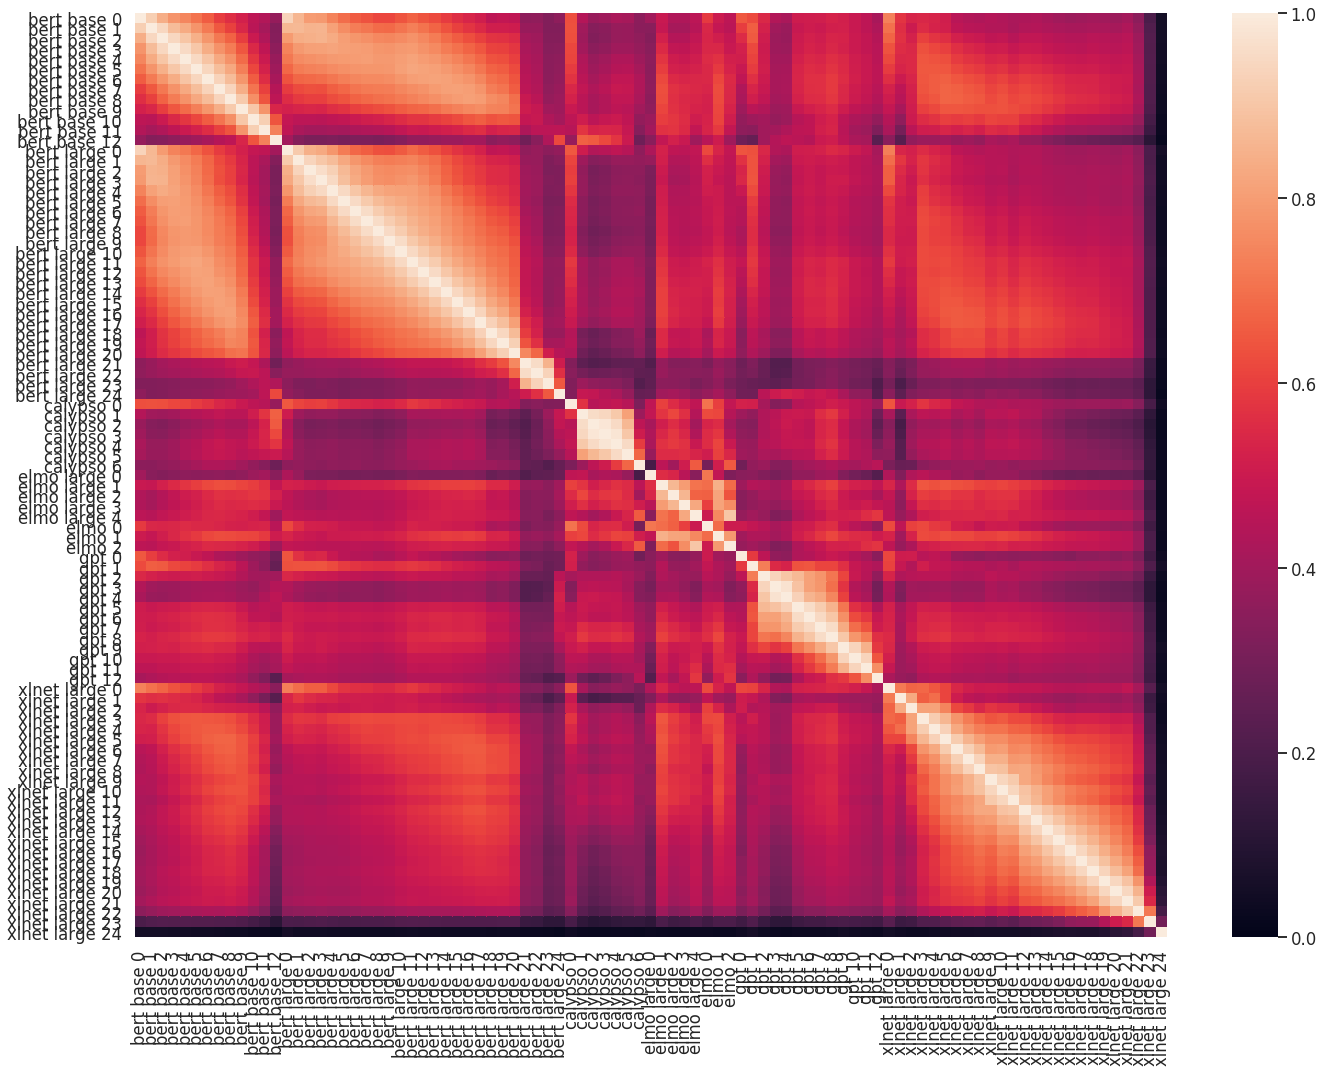

In [22]:
# lincka
fname_prefix = "temp_lincka8_1.00"
fname = "{0}.png".format(fname_prefix)
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
plt.tight_layout()
plt.savefig(fname) #, transparent=True)

In [23]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
        # sns.heatmap(df.fillna(1), )
        plt.tight_layout()
        plt.savefig(fname) #, transparent=True)
        plt.show()

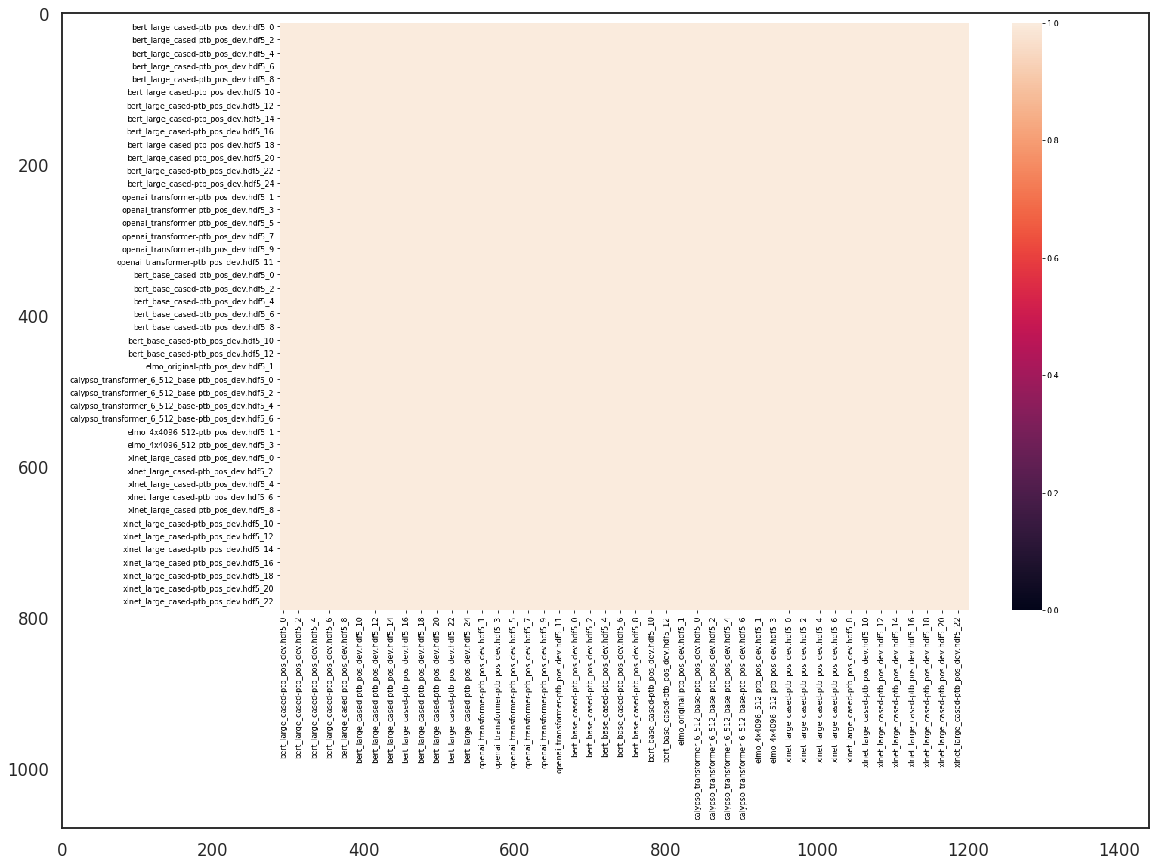

In [24]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw8_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

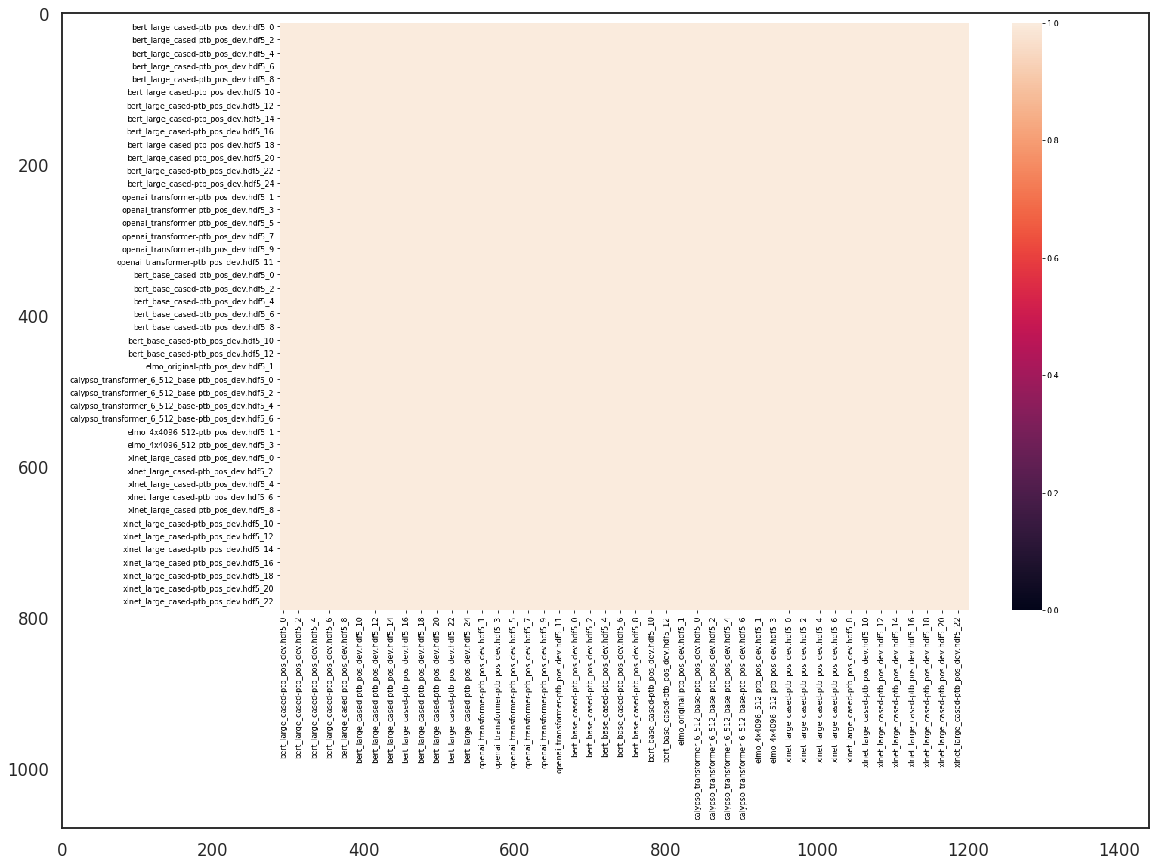

In [25]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

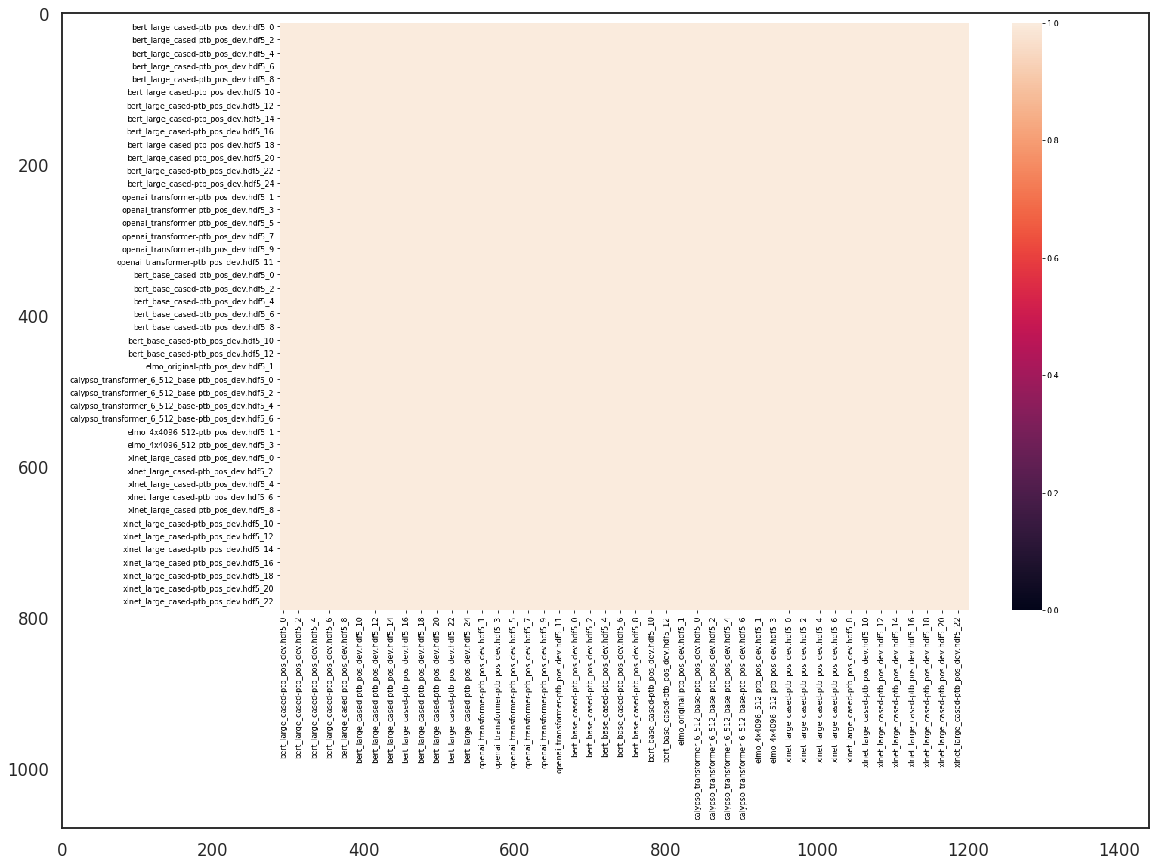

In [26]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

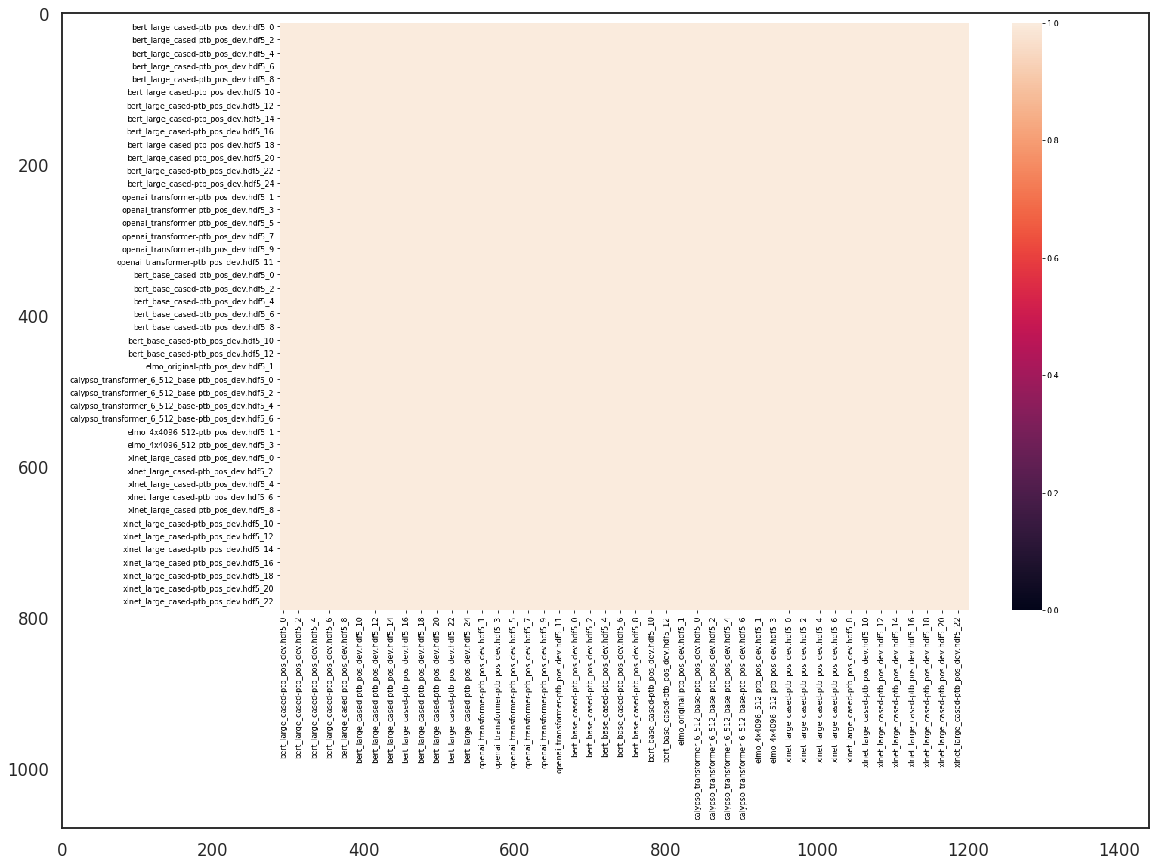

In [27]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

In [28]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [29]:
# comparing models
# use lincka
model1 = "elmo"
model2 = "elmo"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

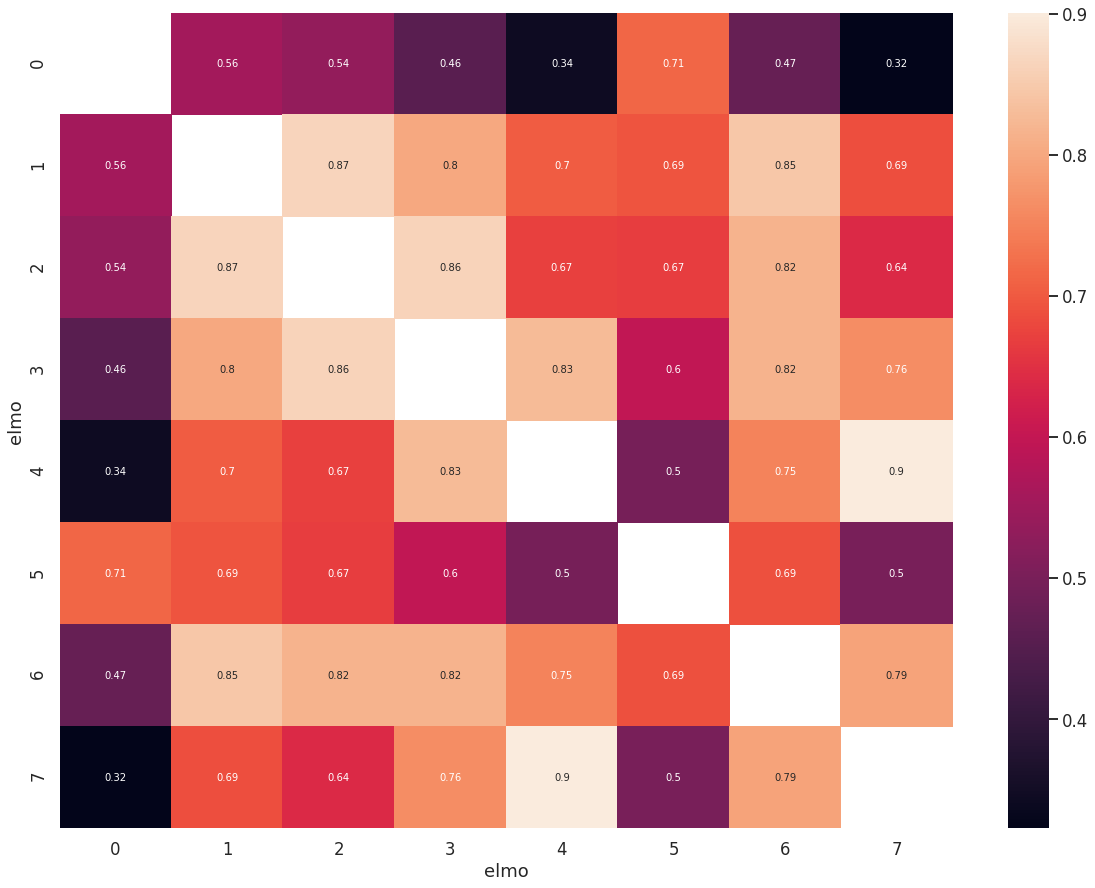

In [30]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

# Localized vs distributed

In [31]:
locl_meth = "maxcorr"
dist_meth = "cca"

# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['sv_similarities'])
dist_df = dist_df.reindex(dist_df.columns)

# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

# diff_ser
diff_ser = locl_ser - dist_ser

['bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'elmo', 'elmo', 'elmo', 'calypso', 'calypso', 'calypso', 'calypso', 'calypso', 'calypso', 'calypso', 'elmo large', 'elmo large', 'elmo large', 'elmo large', 'elmo large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet l

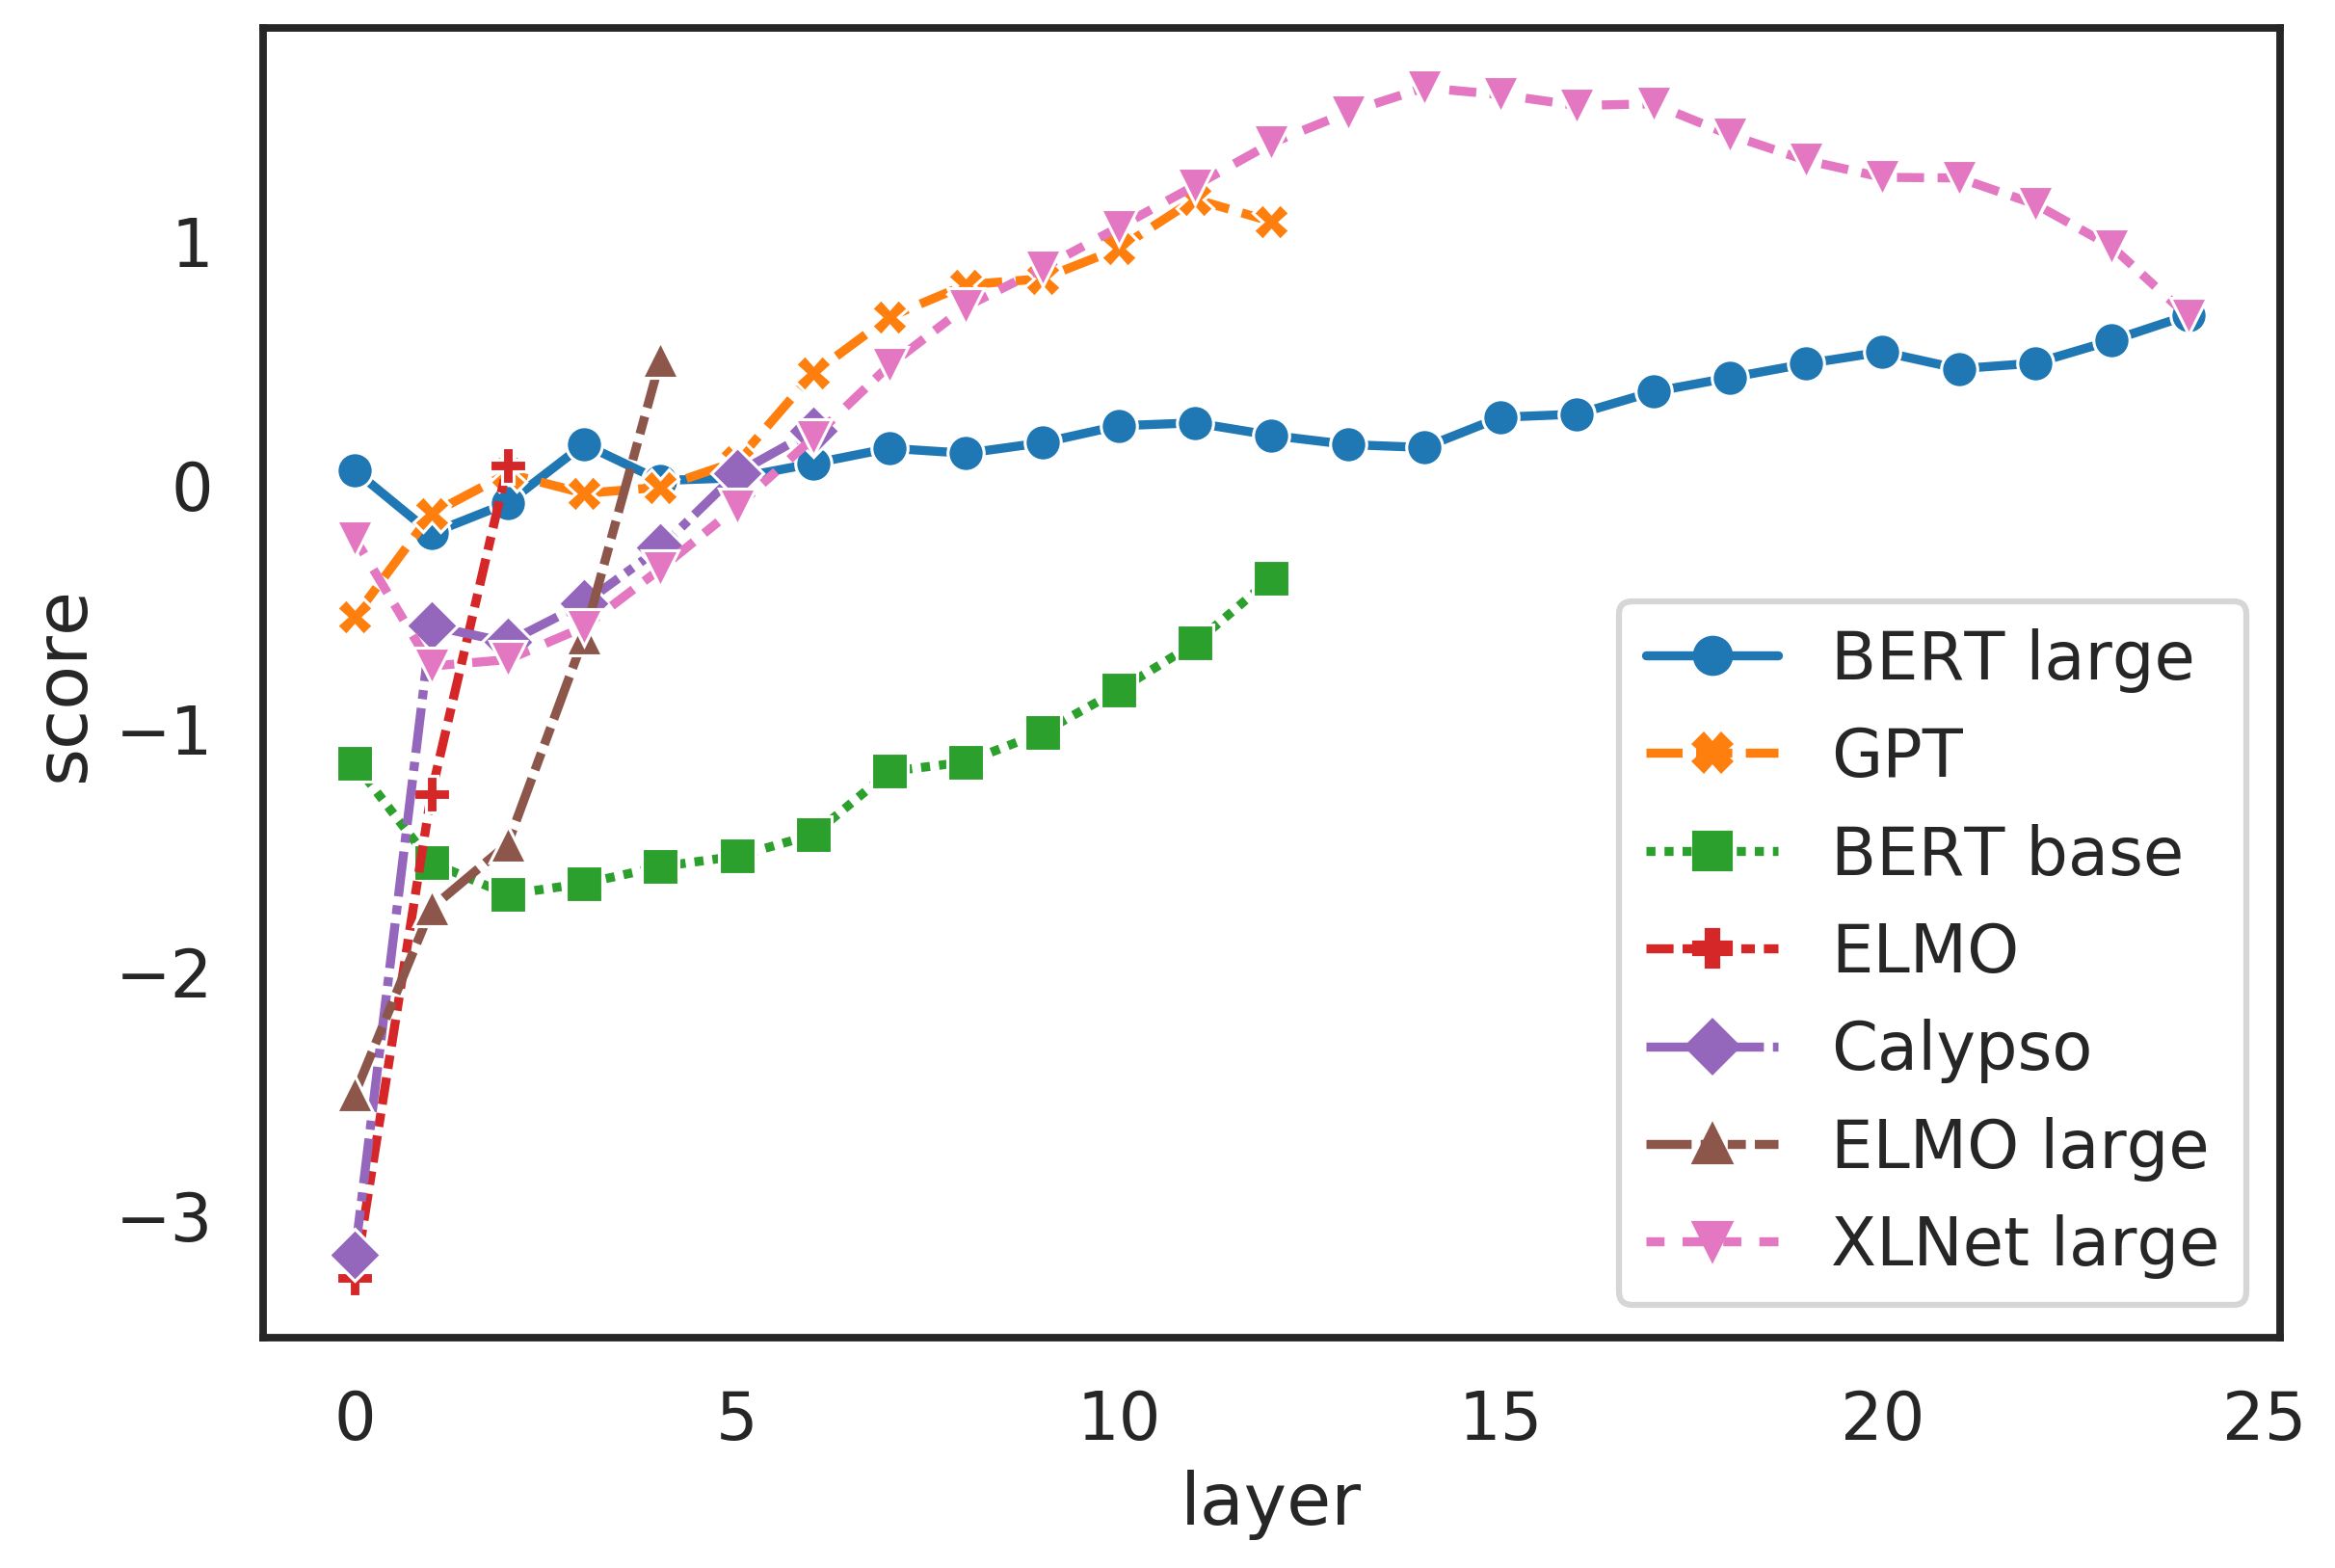

In [32]:
diff_df = pd.DataFrame(diff_ser, columns=['score'])
x = [network_sort_key(layer) for layer in diff_df.index.values]
models, layers = list(zip(*x))
models = [model2short[model] for model in models]
print(models)
# print(layers)
diff_df['layer'] = layers
diff_df['model'] = models
# diff_df.head()
plt.figure(figsize=(9,6), dpi=300)
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]
g = sns.lineplot(data=diff_df, x='layer', y='score', hue='model', style='model', dashes=dash_styles, markers=True)
handles, labels = g.get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
custom_mapping = {
    'bert base': 'BERT base',
    'bert large': 'BERT large',
    'calypso': 'Calypso',
    'elmo large': 'ELMO large',
    'elmo': 'ELMO' ,
    'gpt': 'GPT',
    'xlnet large': 'XLNet large'
}
labels = [custom_mapping[l] for l in labels[1:]]
g.legend(handles=handles[1:], labels=labels)
# g.set_title('Localization score in layers of various models')
g.get_figure().savefig('all-loc-score.pdf')

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(diff_ser.sort_values())

elmo_original-ptb_pos_dev.hdf5_0                           -3.261489
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0          -3.166285
elmo_4x4096_512-ptb_pos_dev.hdf5_0                         -2.503358
elmo_4x4096_512-ptb_pos_dev.hdf5_1                         -1.740609
bert_base_cased-ptb_pos_dev.hdf5_2                         -1.684041
bert_base_cased-ptb_pos_dev.hdf5_3                         -1.638985
bert_base_cased-ptb_pos_dev.hdf5_4                         -1.569860
bert_base_cased-ptb_pos_dev.hdf5_1                         -1.553117
bert_base_cased-ptb_pos_dev.hdf5_5                         -1.527142
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         -1.477290
bert_base_cased-ptb_pos_dev.hdf5_6                         -1.438886
elmo_original-ptb_pos_dev.hdf5_1                           -1.270369
bert_base_cased-ptb_pos_dev.hdf5_7                         -1.178698
bert_base_cased-ptb_pos_dev.hdf5_0                         -1.147027
bert_base_cased-ptb_pos_dev.hdf5_8

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(locl_ser.sort_values())

elmo_original-ptb_pos_dev.hdf5_0                           -2.774173
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         -2.479347
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24   -2.387685
elmo_4x4096_512-ptb_pos_dev.hdf5_0                         -2.305946
elmo_4x4096_512-ptb_pos_dev.hdf5_3                         -2.225689
elmo_4x4096_512-ptb_pos_dev.hdf5_1                         -2.165911
elmo_original-ptb_pos_dev.hdf5_2                           -2.059550
elmo_original-ptb_pos_dev.hdf5_1                           -1.991297
elmo_4x4096_512-ptb_pos_dev.hdf5_4                         -1.862020
openai_transformer-ptb_pos_dev.hdf5_0                      -1.551385
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0          -1.399314
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6          -1.220294
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23   -1.028807
openai_transformer-ptb_pos_dev.hdf5_12                     -1.003151
bert_large_cased-ptb_pos_dev.hdf5_

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(dist_ser.sort_values())

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24   -3.078343
elmo_4x4096_512-ptb_pos_dev.hdf5_4                         -2.374976
elmo_original-ptb_pos_dev.hdf5_2                           -2.138725
openai_transformer-ptb_pos_dev.hdf5_12                     -2.083333
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23   -2.005953
bert_large_cased-ptb_pos_dev.hdf5_24                       -1.650284
elmo_4x4096_512-ptb_pos_dev.hdf5_3                         -1.597784
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6          -1.440840
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22   -1.430081
openai_transformer-ptb_pos_dev.hdf5_11                     -1.372944
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21   -1.138135
bert_large_cased-ptb_pos_dev.hdf5_23                       -1.116413
openai_transformer-ptb_pos_dev.hdf5_0                      -1.007856
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         -1.002057
xlnet_large_cased-ptb_pos_dev_incl